In [17]:
import numpy as np
import math
import pandas as pd
from scipy.stats import multivariate_normal
import pylab

In [3]:
V = 58
d = {1: 40 + V, 2: 100 - V, 3: 30 + V, 4: 25 + V, 5: V, 6: 100 + V, 7: 230 - V, 8: 110 + V, 9: 120 + V, 10: 180 - V}
t = {1: 10 + V, 2: 110 - V, 3: 20 + V, 4: 15 + V, 5: 105- V, 6: 120 + V, 7: 220 - V, 8: 90 + V, 9: 200 + V, 10: 160 - V}
q = {1: True, 2: True, 3: True, 4: True, 5: True, 6: True, 7: False, 8: False, 9: False, 10: False}
data = {'X1': pd.Series(d), 'X2': pd.Series(t), 'Class': pd.Series(q)}
df = pd.DataFrame(data)
df

,Class,X1,X2
1,True,98,68
2,True,42,52
3,True,88,78
4,True,83,73
5,True,58,47
6,True,158,178
7,False,172,162
8,False,168,148
9,False,178,258
10,False,122,102


In [4]:
meanTrueX1 = df[df['Class'] == True]['X1'].mean()
meanTrueX2 = df[df['Class'] == True]['X2'].mean()
meanFalseX1 = df[df['Class'] == False]['X1'].mean()
meanFalseX2 = df[df['Class'] == False]['X2'].mean()
stdTrueX1 = df[df['Class'] == True]['X1'].var()
stdTrueX2 = df[df['Class'] == True]['X2'].var()
stdFalseX1 = df[df['Class'] == False]['X1'].var()
stdFalseX2 = df[df['Class'] == False]['X2'].var()
print("mean" , meanTrueX1, meanTrueX2, meanFalseX1, meanFalseX2)
print("std" , stdTrueX1, stdTrueX2, stdFalseX1, stdFalseX2)

mean 87.83333333333333 82.66666666666667 160.0 167.5
std 1608.1666666666667 2326.2666666666664 658.6666666666666 4297.0


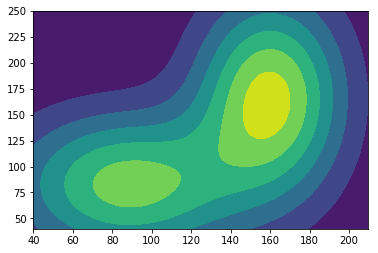

In [5]:
x, y = np.mgrid[40:210:.4, 40:250:.4]
sigma = ((stdTrueX1+ stdTrueX2)+ (stdFalseX1+ stdFalseX2))/4
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
meanTrue = multivariate_normal([meanTrueX1, meanTrueX2], [[stdTrueX1, 0], [0, stdTrueX2]])
meanFalse = multivariate_normal([meanFalseX1, meanFalseX2], [[stdFalseX1, 0], [0, stdFalseX2]])
pylab.contourf(x, y, meanTrue.pdf(pos) + meanFalse.pdf(pos))
pylab.show()

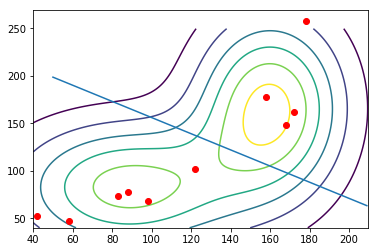

In [6]:
sigma = ((stdTrueX1+ stdTrueX2)+ (stdFalseX1+ stdFalseX2))/4
a = (meanFalseX1 - meanTrueX1)/(meanTrueX2 - meanFalseX2)
b = (pow(meanTrueX1,2) + pow(meanTrueX2,2) - pow(meanFalseX1,2) - pow(meanFalseX2,2))\
    /(2*(meanTrueX2 - meanFalseX2)) - sigma/(meanTrueX2 - meanFalseX2)*math.log(3/2) 
x1 = np.linspace(50,209,1000)
y1 = a*x1 + b
pylab.plot(x1, y1)
X1 = df['X1'].values
X2 = df['X2'].values
pylab.plot(X1, X2, 'ro')
pylab.contour(x, y, meanTrue.pdf(pos) + meanFalse.pdf(pos))
pylab.show()

# 4 Task

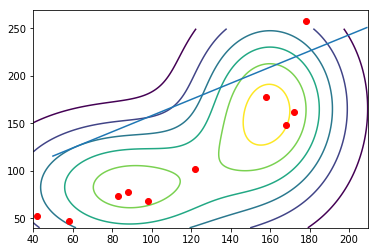

In [38]:
covMatr = np.matrix([[1/sigma, 0], [0, 1/sigma]])
meanVecTrue = np.matrix([[meanTrueX1], [meanTrueX2]])
meanVecFalse = np.matrix([[meanFalseX1], [meanFalseX2]])
w = covMatr*(meanVecFalse - meanVecTrue)
X01 = 1/2*(meanVecFalse - meanVecTrue) - (math.log(3/5) - math.log(2/5))\
         /((meanVecFalse.transpose() - meanVecTrue.transpose())* covMatr*(meanVecFalse - meanVecTrue))
w1 = w.A[0][0]
w2 = w.A[1][0]
c = w.transpose()*X01
c = c.A[0][0]
y2 = c/w2 + w1/w2*x1
pylab.contour(x, y, meanTrue.pdf(pos) + meanFalse.pdf(pos))
pylab.plot(x1, y2)
pylab.plot(X1, X2, 'ro')
pylab.show()

# Task 8 

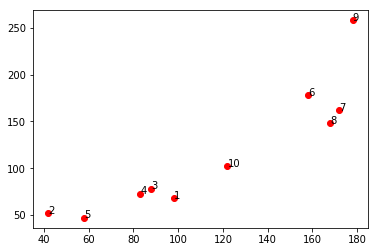

In [63]:
Dots = [[df['X1'][i], df['X2'][i]] for i in range(1, df['X1'].count() + 1)]
arr = np.zeros((10,10))
for i in range(0, df['X1'].count()):
    for j in range(0, df['X1'].count()):
         arr[i][j] = np.linalg.norm(np.array(Dots[i])-np.array(Dots[j]))
pylab.plot(X1, X2, 'ro')
for i in range(0, len(X1)):
    pylab.text(X1[i],X2[i],str(i+1))
pylab.show()